# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados
sinasc_data = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [69]:
# Função para categorizar os valores de APGAR5
def categorizar_apgar(apgar):
    if apgar >= 0 and apgar <= 3:
        return 'asfixia grave'
    elif apgar >= 4 and apgar <= 5:
        return 'asfixia moderada'
    elif apgar >= 6 and apgar <= 7:
        return 'asfixia leve'
    elif apgar >= 8 and apgar <= 10:
        return 'normal'
    else:
        return 'fora do intervalo'

# Aplicar a função à coluna APGAR5
sinasc_data['categoria_apgar'] = sinasc_data['APGAR5'].apply(categorizar_apgar)

# Exibir o DataFrame modificado
print(sinasc_data[['APGAR5', 'categoria_apgar']])

       APGAR5 categoria_apgar
0        10.0          normal
1         9.0          normal
2        10.0          normal
3        10.0          normal
4        10.0          normal
...       ...             ...
27023     9.0          normal
27024     9.0          normal
27025    10.0          normal
27026     9.0          normal
27027     8.0          normal

[27028 rows x 2 columns]


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

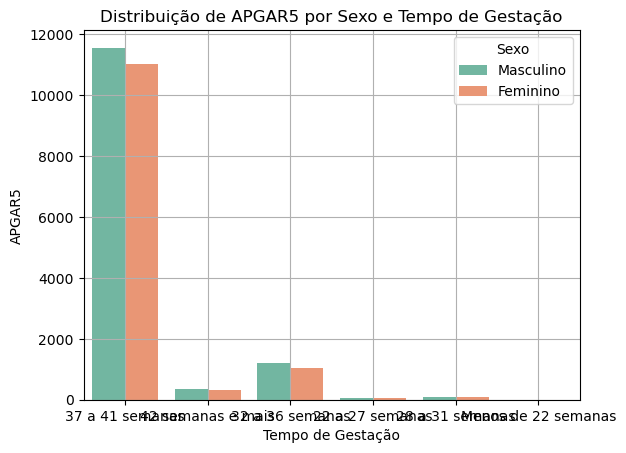

In [71]:
# Gráfico
sns.countplot(x='GESTACAO'
              , hue = 'SEXO'
              , data=sinasc_data, palette='Set2'
             )

# Configurações do gráfico
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.grid(True)
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [73]:
# Tabela cruzada
tabela_cruzada = pd.crosstab(sinasc_data['GESTACAO'], sinasc_data['APGAR5'])
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [97]:
# Percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Coluna para o total
percentuais_linha['Total'] = percentuais_linha.sum(axis=1)

print(percentuais_linha)


APGAR5                     0.0       1.0        2.0       3.0       4.0  \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                    5.0       6.0        7.0        8.0        9.0  \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1500x1000 with 0 Axes>

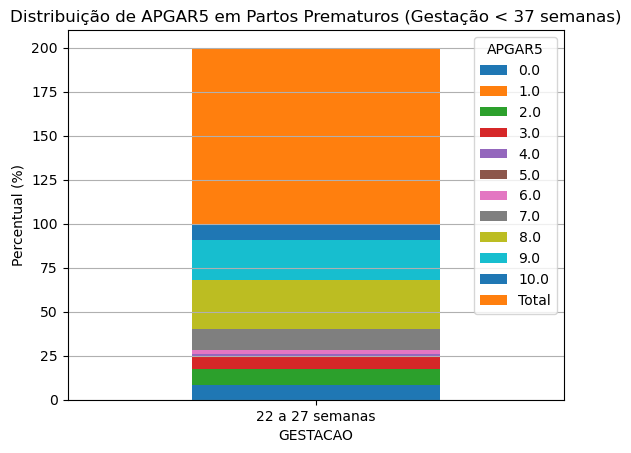

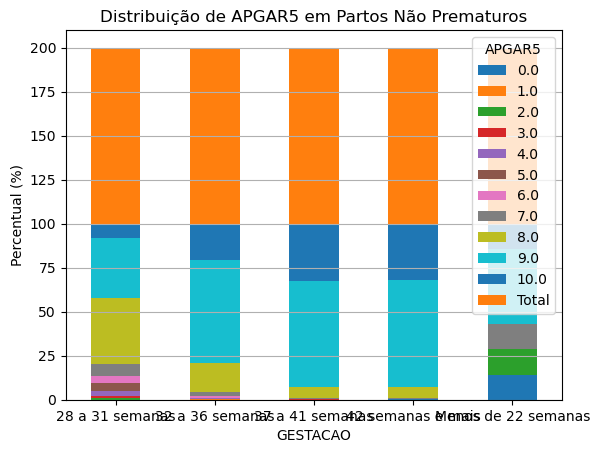

In [147]:
# Filtrar os dados 
sinasc_data['GESTACAO'] = pd.to_numeric(sinasc_data['GESTACAO'], errors='coerce')

gestacao_prematura = percentuais_linha.loc[percentuais_linha.index < '27']
gestacao_normal = percentuais_linha.loc[percentuais_linha.index > '27']


# Gráfico de barras
plt.figure(figsize=(15, 10))
gestacao_prematura.plot(kind='bar', stacked=True)
plt.title('Distribuição de APGAR5 em Partos Prematuros (Gestação < 37 semanas)')
#plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Percentual (%)')
plt.legend(title='APGAR5')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

gestacao_normal.plot(kind='bar', stacked=True)
plt.title('Distribuição de APGAR5 em Partos Não Prematuros')
#plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Percentual (%)')
plt.legend(title='APGAR5')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

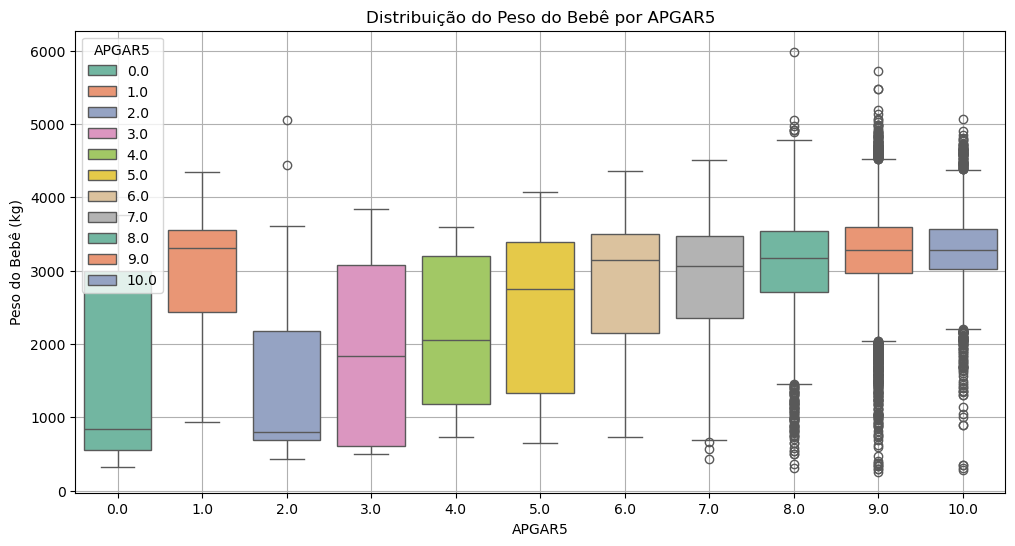

In [153]:
# Colunas numéricas
sinasc_data['APGAR5'] = pd.to_numeric(sinasc_data['APGAR5'], errors='coerce')
sinasc_data['PESO'] = pd.to_numeric(sinasc_data['PESO'], errors='coerce')

sinasc_data = sinasc_data.dropna(subset=['APGAR5', 'PESO'])

#Gráfico de Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=sinasc_data, x='APGAR5', y='PESO', hue='APGAR5', palette='Set2')
plt.title('Distribuição do Peso do Bebê por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (kg)')
plt.grid()
plt.show()

Como visto no gráfico os bebês com mais de 2kg tendem a ter apgar acima de 6 o que indica boas condiçãos.